In [30]:
# MLP with manual validation set
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [31]:
# load pima indians dataset
dataset = pd.read_csv("dati/diabetes.csv")

In [32]:
# split into input (X) and output (Y) variables
X = dataset.iloc[:,0:8]
Y = dataset.iloc[:,8]

In [33]:
Y.shape

(768,)

In [34]:
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [35]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

Epoch 1/150
52/52 [==============================] - 0s 4ms/step - loss: 4.1616 - accuracy: 0.4358 - val_loss: 1.0703 - val_accuracy: 0.5709
Epoch 2/150
52/52 [==============================] - 0s 2ms/step - loss: 0.9742 - accuracy: 0.5973 - val_loss: 0.9078 - val_accuracy: 0.5709
Epoch 3/150
52/52 [==============================] - 0s 2ms/step - loss: 0.8779 - accuracy: 0.5914 - val_loss: 0.8786 - val_accuracy: 0.5709
Epoch 4/150
52/52 [==============================] - 0s 2ms/step - loss: 0.8250 - accuracy: 0.6226 - val_loss: 0.8198 - val_accuracy: 0.5748
Epoch 5/150
52/52 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.6206 - val_loss: 0.7802 - val_accuracy: 0.6102
Epoch 6/150
52/52 [==============================] - 0s 2ms/step - loss: 0.7223 - accuracy: 0.6498 - val_loss: 0.7524 - val_accuracy: 0.6181
Epoch 7/150
52/52 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.6809 - val_loss: 0.7389 - val_accuracy: 0.6142
Epoch 8/150
5

Epoch 59/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5849 - accuracy: 0.7160 - val_loss: 0.7284 - val_accuracy: 0.6969
Epoch 60/150
52/52 [==============================] - 0s 1ms/step - loss: 0.5649 - accuracy: 0.7101 - val_loss: 0.6405 - val_accuracy: 0.7126
Epoch 61/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7198 - val_loss: 0.6488 - val_accuracy: 0.6890
Epoch 62/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7374 - val_loss: 0.6496 - val_accuracy: 0.7126
Epoch 63/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5456 - accuracy: 0.7296 - val_loss: 0.6553 - val_accuracy: 0.6850
Epoch 64/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7315 - val_loss: 0.6572 - val_accuracy: 0.7047
Epoch 65/150
52/52 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.7140 - val_loss: 0.6382 - val_accuracy: 0.7087
Epoch 

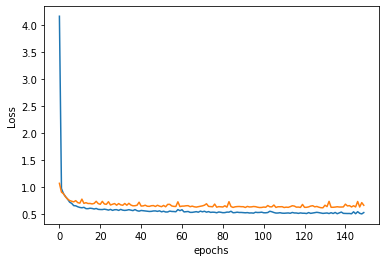

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

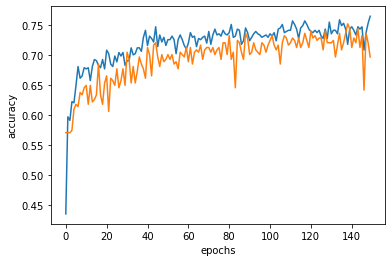

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [39]:
yhat = model.predict(X_test)

In [40]:
yhat = model.predict(X_test)
yhat

array([[7.88838923e-01],
       [6.12501800e-01],
       [4.91244406e-01],
       [4.04557586e-02],
       [4.36213762e-01],
       [6.00415111e-01],
       [5.87216139e-01],
       [3.23100567e-01],
       [4.50554878e-01],
       [4.42283064e-01],
       [4.19850409e-01],
       [2.58289337e-01],
       [8.81159782e-01],
       [7.62770891e-01],
       [1.08838230e-01],
       [7.49668062e-01],
       [4.40499663e-01],
       [2.24077731e-01],
       [6.20229959e-01],
       [6.02863967e-01],
       [7.38769889e-01],
       [2.22265571e-01],
       [6.27678156e-01],
       [5.53610504e-01],
       [1.59219116e-01],
       [5.91029584e-01],
       [3.24809790e-01],
       [6.71365738e-01],
       [1.90400839e-01],
       [5.64437687e-01],
       [4.76341724e-01],
       [5.74577808e-01],
       [1.44466132e-01],
       [8.59974563e-01],
       [2.95089126e-01],
       [8.68198991e-01],
       [1.41905755e-01],
       [3.90800178e-01],
       [2.56807029e-01],
       [8.14460635e-01],


In [41]:
l = []
for i in yhat: 
    if i[0] >= 0.5: 
        l.append(1)
    else: 
        l.append(0)

In [42]:
yhat = np.array(l)

In [43]:
from sklearn import metrics 

In [44]:
metrics.accuracy_score(y_test, yhat)

0.6968503937007874

In [45]:
cm = metrics.confusion_matrix(y_test, yhat)

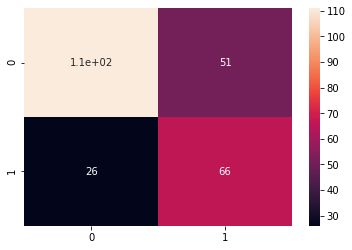

In [47]:
sb.heatmap(cm, annot=True)

In [27]:
metrics.precision_score(y_test, yhat)

0.631578947368421

In [28]:
metrics.recall_score(y_test, yhat)

0.6521739130434783